# Analysing & Predicting Data Using CSV's

In [12]:
# Installing Necessary Libraries 
!pip install -U scikit-learn
!pip install sklearn
! pip install keras
! pip install tensorflow


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 MB 2.5 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 8.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 3.3

  Using cached MarkupSafe-2.1.2-cp37-cp37m-macosx_10_9_x86_64.whl (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [14]:
pip install tensorflow


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt

In [24]:
# --> Creating a list that Contains CSV names for Preprocessing

csv_names = ('tcs.csv', 'hdfcbank.csv', 'infy.csv', 'kotakbank.csv', 'hindunilvr.csv', 'icicibank.csv', 'reliance.csv')


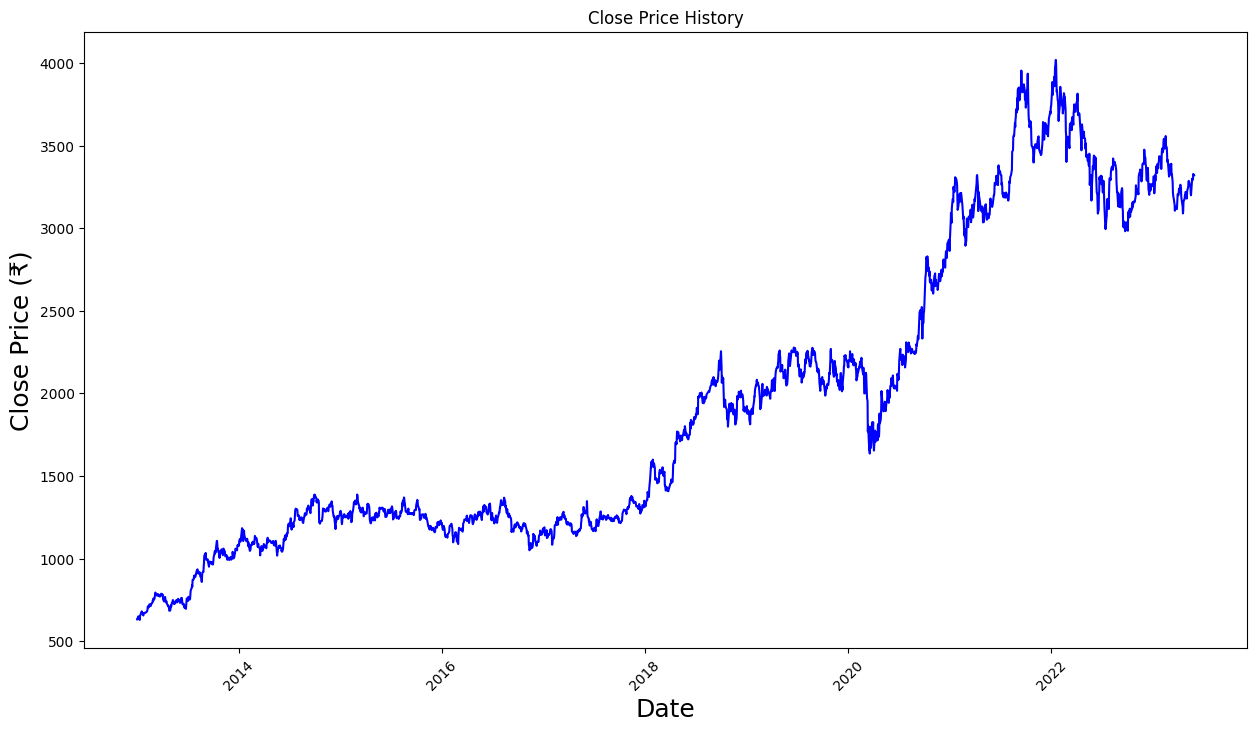

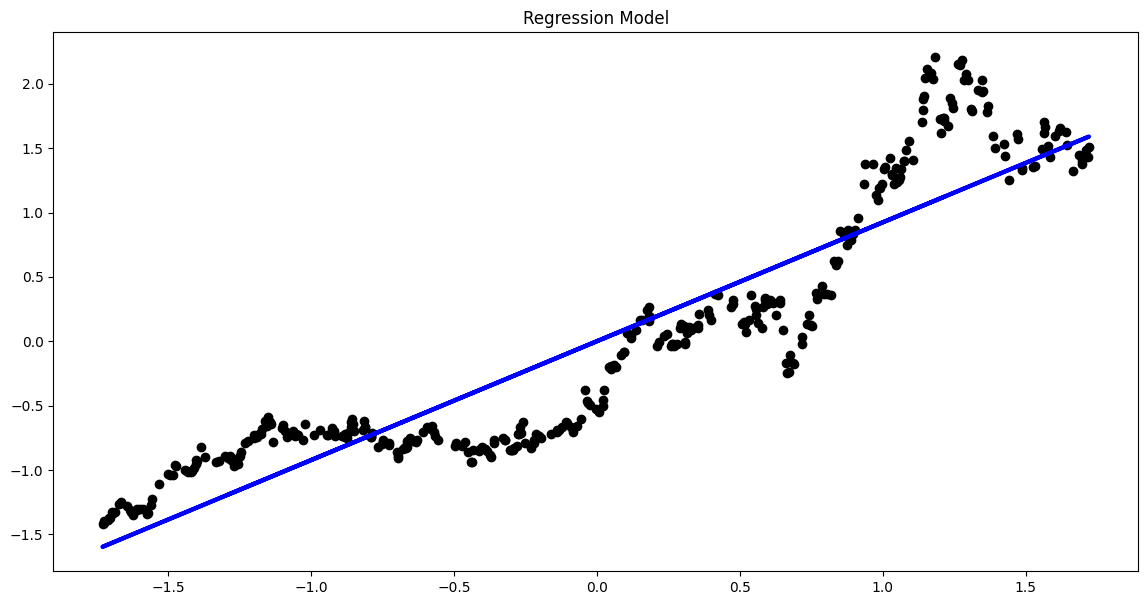

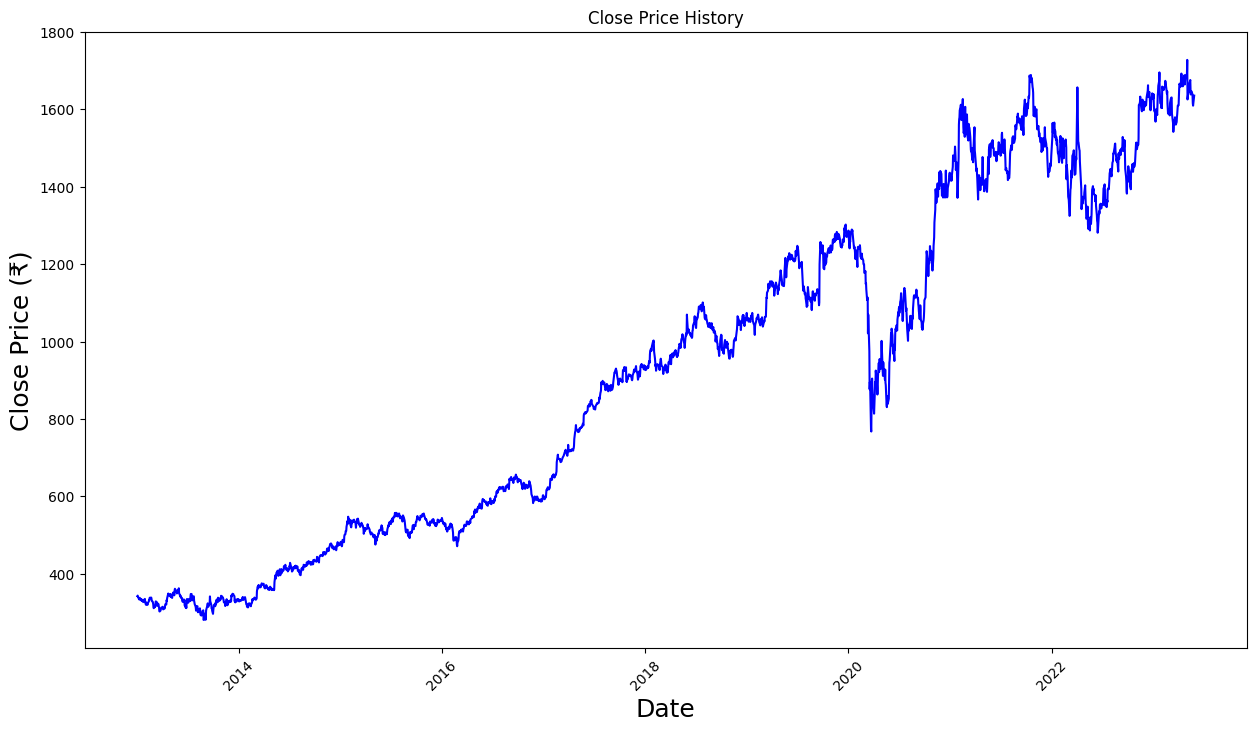

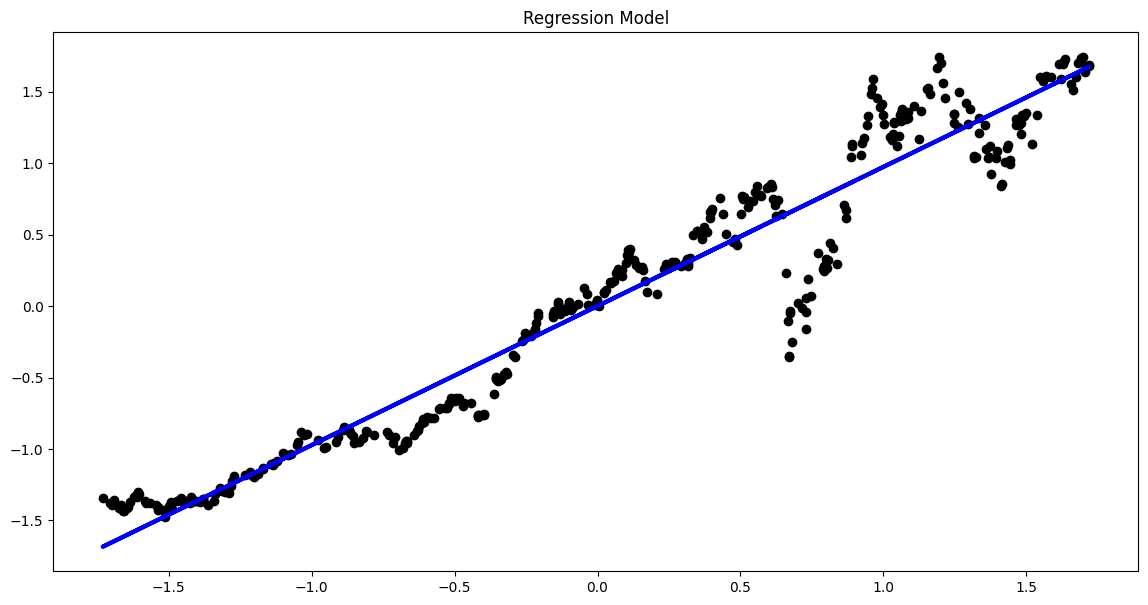

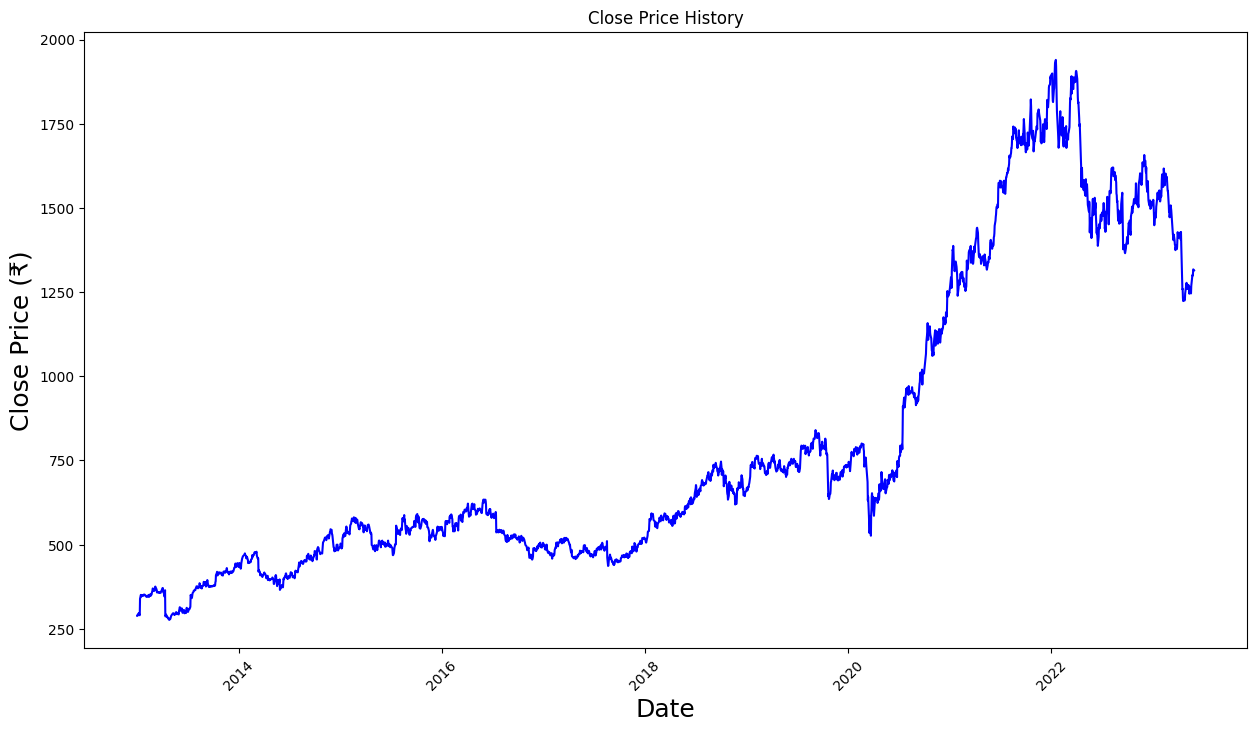

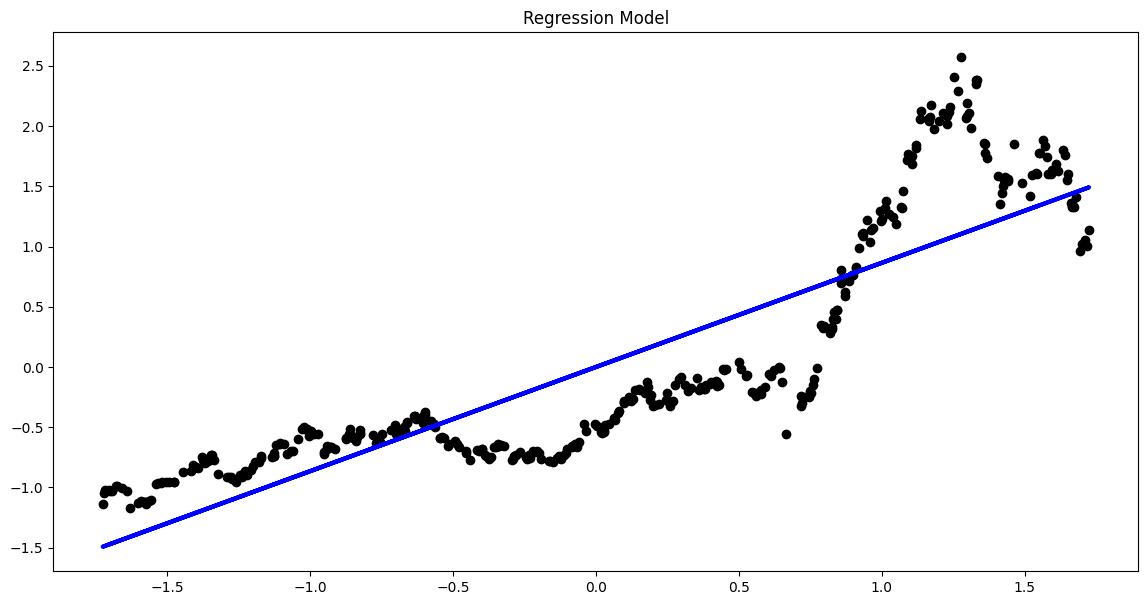

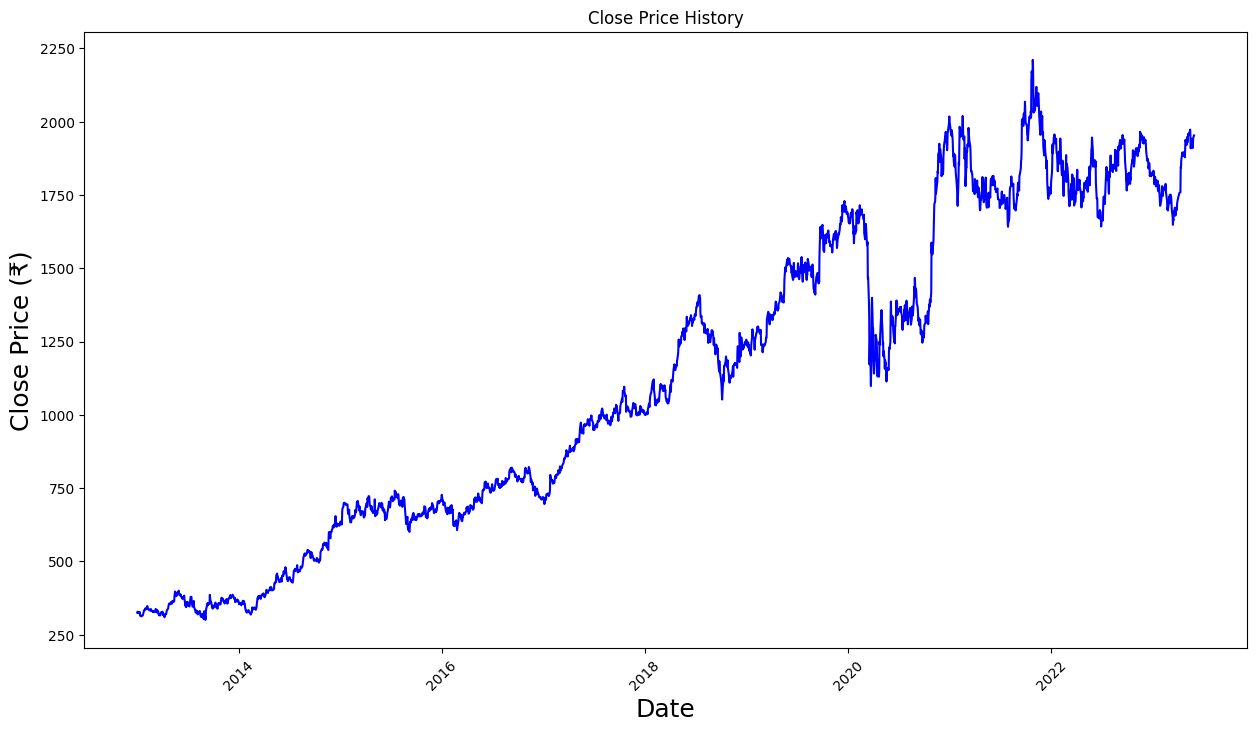

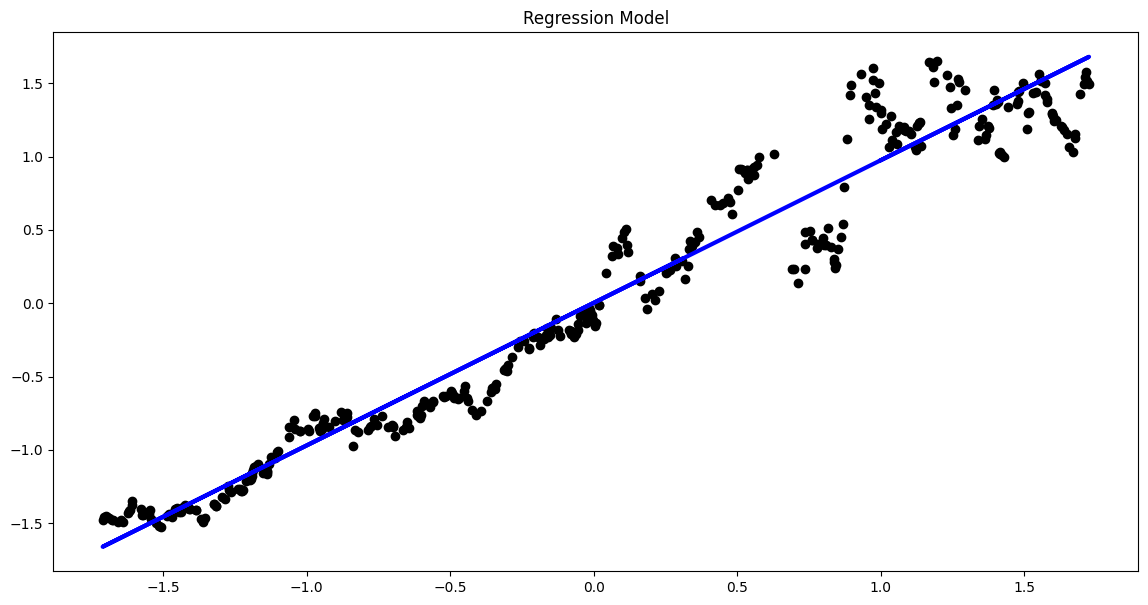

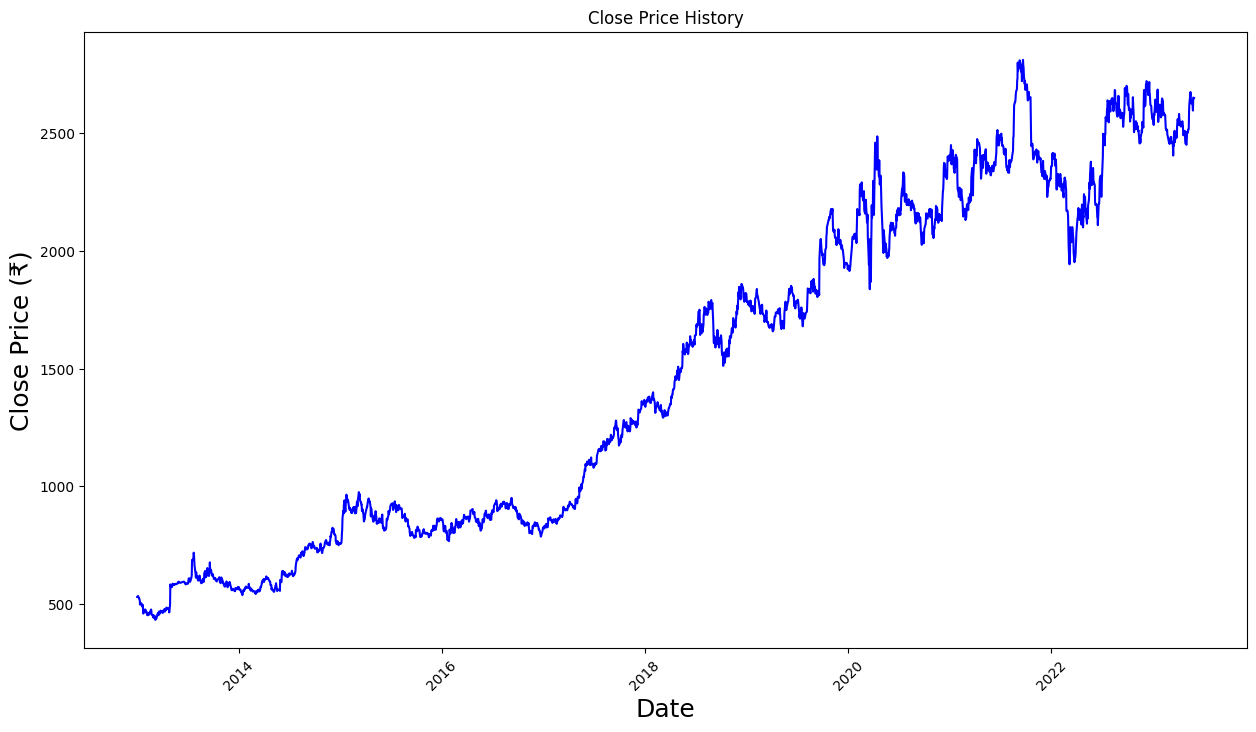

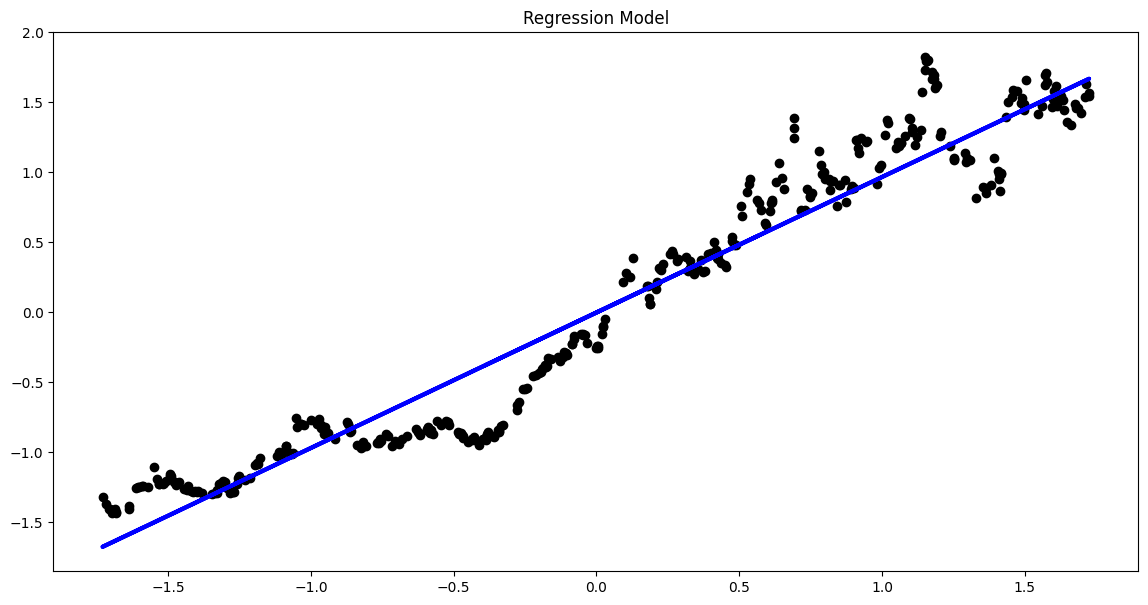

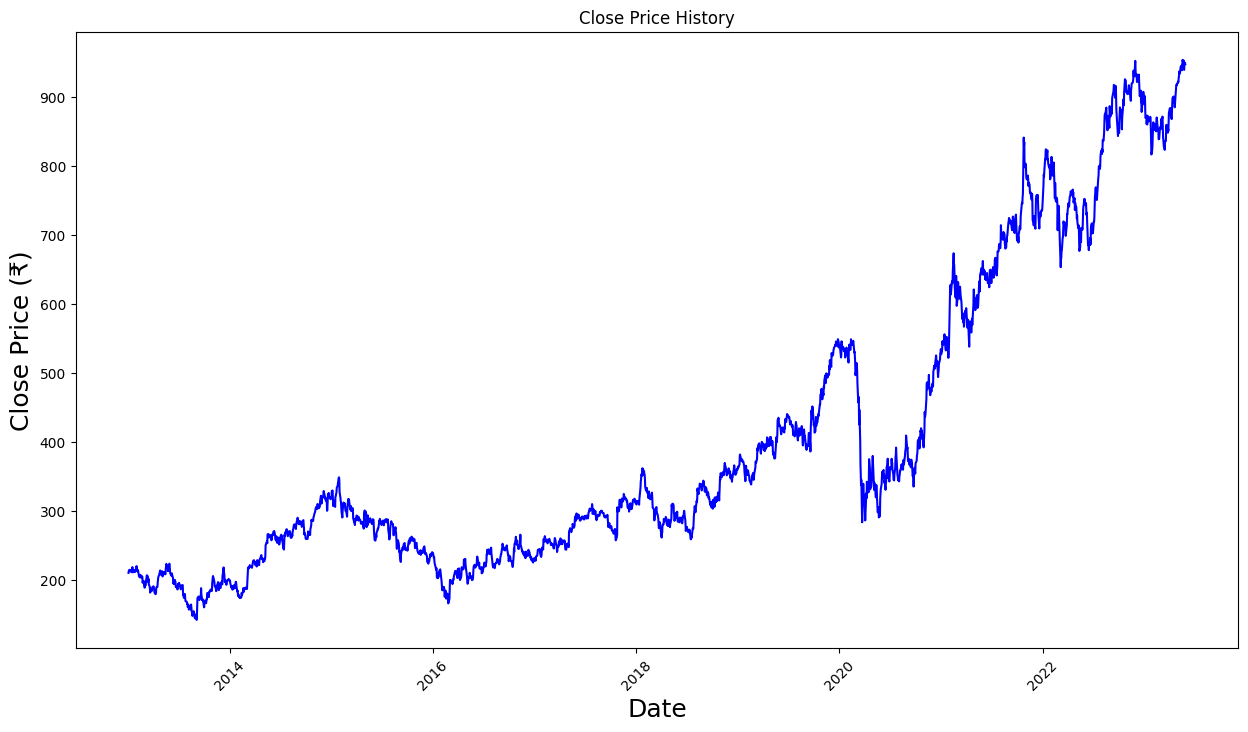

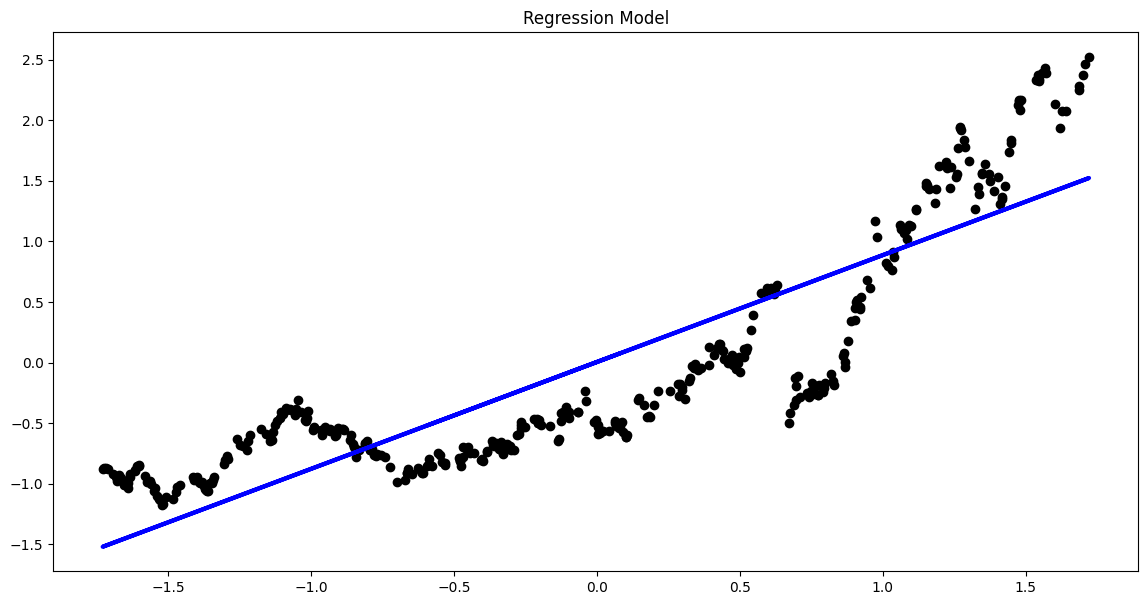

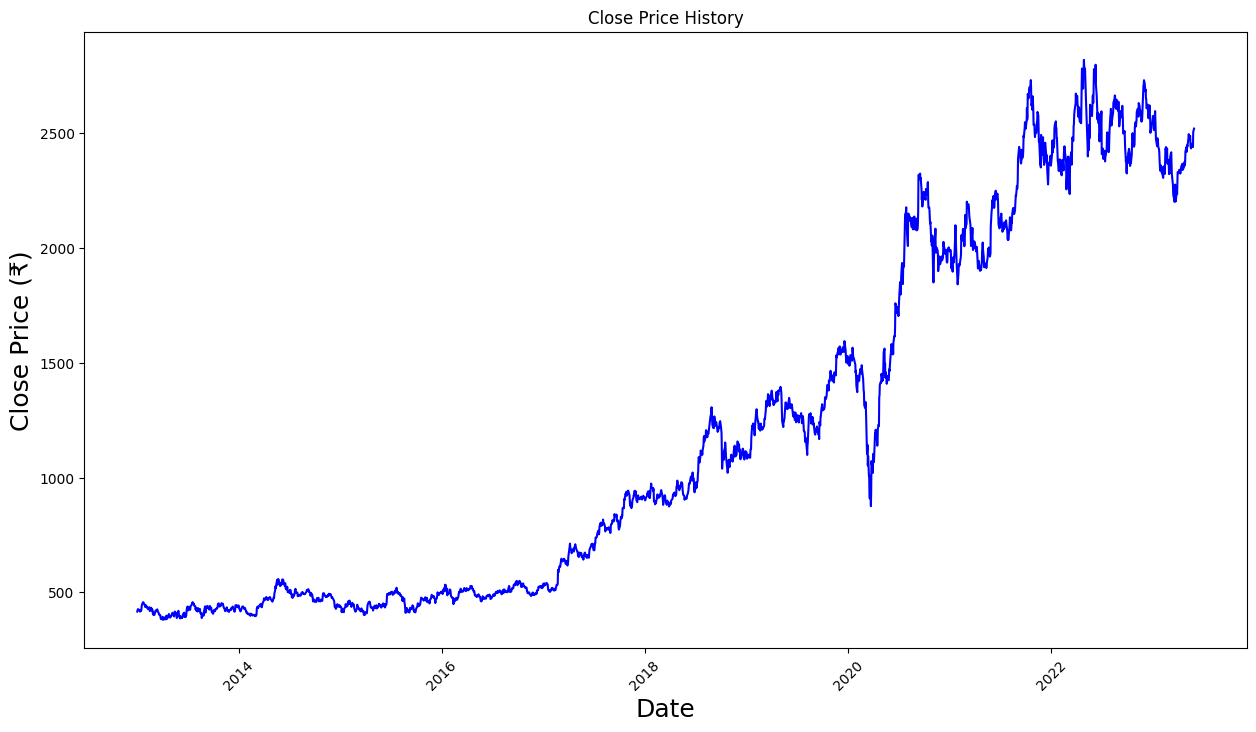

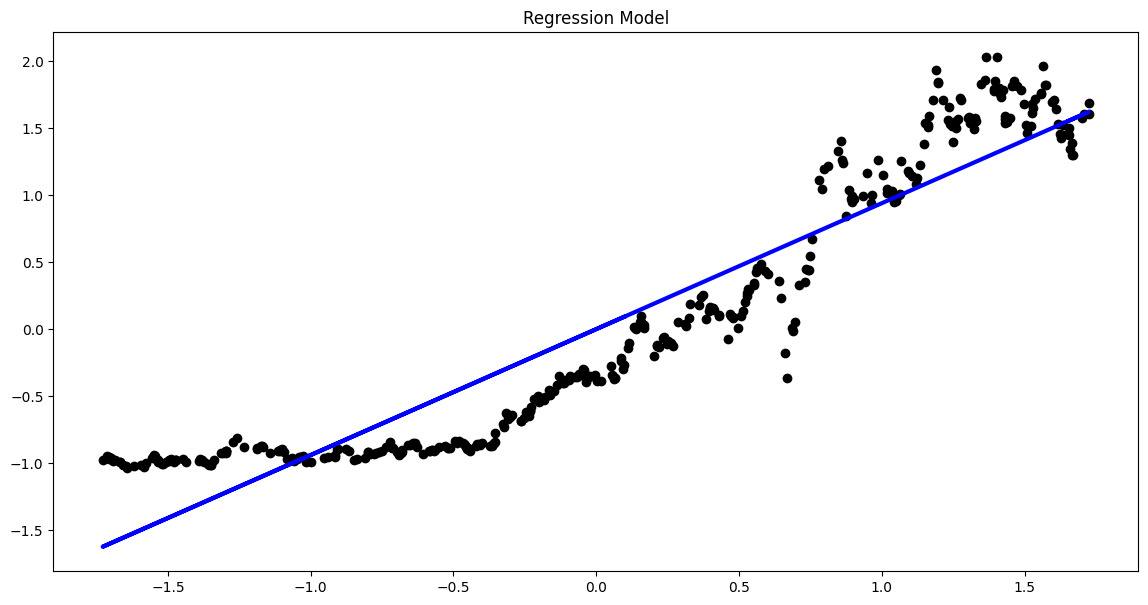

In [29]:
# Looping Through CSV's & Finding Results

model_results = []

for csv in csv_names:
    company_name = csv.split('.')[0]
    # Reading CSV File
    stocks_df= pd.read_csv(csv)
    
    # Convert Date column from 'object' to 'datetime' data-type
    stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
    
    #Visualize the closing price history
    plt.figure(figsize=(15,8))
    plt.title('Close Price History')
    plt.plot('Date','Close',data=stocks_df, color= 'b')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Close Price (₹)',fontsize=18)
    plt.xticks(rotation=45)
    plt.savefig(f'{company_name}.png')
    
    #Create new dataframe with only 'Close' and 'Date' column
    reg_df= stocks_df.filter(['Date', 'Close'])
    
    ## Feature Extraction
    y = reg_df['Close']
    x= reg_df.drop(columns=['Close'])

    #Converting the dataframe to a numpy array
    x= np.array(x)
    y= np.array(y)

    #Reshape data to 2d (Regression)
    y=y.reshape(-1,1)

    # Scaling data before training the model
    scaler_x = StandardScaler()
    x = scaler_x.fit_transform(x)
    scaler_y = StandardScaler()
    y = scaler_y.fit_transform(y)
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15)
    
    LinearRegression_model= LinearRegression()
    LinearRegression_model.fit(x_train, y_train)
    
    #Calculating Predicted values 
    y_predict = LinearRegression_model.predict(x_test)

    # Calculating Original values (Undo Scaling)
    y_predict_orig = scaler_y.inverse_transform(y_predict) 
    y_test_orig = scaler_y.inverse_transform(y_test)

    k = x_test.shape[1]
    n = len(x_test)
    
    # Calculating accuracy of Model
    accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)
    
    # Calculating Root Mean Square Error (RMSE), Mean Square Error (MSE), Mean Absolute Error (MAE), 
    # Coefficient of Determination (R^2) , Adjusted R^2 (adj_r2)
    RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)), '.3f'))
    MSE = mean_squared_error(y_test_orig, y_predict_orig)
    MAE = mean_absolute_error(y_test_orig, y_predict_orig)
    r2 = r2_score(y_test_orig, y_predict_orig)
    adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
    
    model_results.append([company_name,RMSE, MSE, MAE, r2, adj_r2])
    
    plt.figure(figsize=(14,7))
    plt.title("Regression Model")

    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_test, y_predict, color='blue', linewidth=3)

    plt.savefig(f'{company_name}_regression_model.png')
    


In [30]:
# Saving Results into DataFrame 

df = pd.DataFrame(model_results, columns=['Company','RMSE', 'MSE', 'MAE','R2', 'Adjusted R2'])
df

,Company,RMSE,MSE,MAE,R2,Adjusted R2
0,tcs,357.368,127711.658146,297.810189,0.845711,0.845309
1,hdfcbank,109.855,12068.152773,81.397201,0.934601,0.934431
2,infy,217.768,47423.002325,184.205252,0.759185,0.758558
3,kotakbank,121.464,14753.432632,92.997414,0.950797,0.950669
4,hindunilvr,186.045,34612.680006,147.346560,0.937049,0.936885
5,icicibank,104.517,10923.856565,91.572879,0.743024,0.742355
6,reliance,273.593,74853.312331,240.210165,0.880694,0.880383


In [31]:
# Saving Results To CSV
df.to_csv("model_results.csv",index=False)